In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import poisson

#function for reading bitmap file
def read_bmp(path_to_file):
    return plt.imread(path_to_file)

#function for extracting the value of pixel at x and y position and of a given color (0-red, 1-green, 2-blue)
def get_pixel(image,x,y,color):
    return image[x][y][color]

path = os.path.join(r'C:\Users\Nikita Sichov\Downloads\Physics Lab\Spektroskopie\images\red_hydro.tif')
image = read_bmp(path)
print(get_pixel(image,4,2,0))


0


Text(0.5, 1.0, 'BLUE')

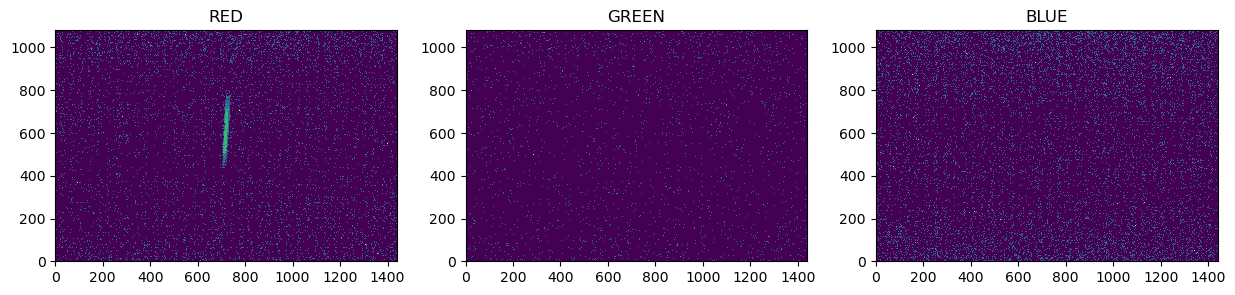

In [3]:
fig = plt.figure(figsize=(15,3))
ax1 = plt.subplot(131)
ax1.pcolormesh(image[:,:,0])
ax1.set_title('RED')

ax2 = plt.subplot(132)
ax2.pcolormesh(image[:,:,1])
ax2.set_title('GREEN')

ax3 = plt.subplot(133)
ax3.pcolormesh(image[:,:,2])
ax3.set_title('BLUE')


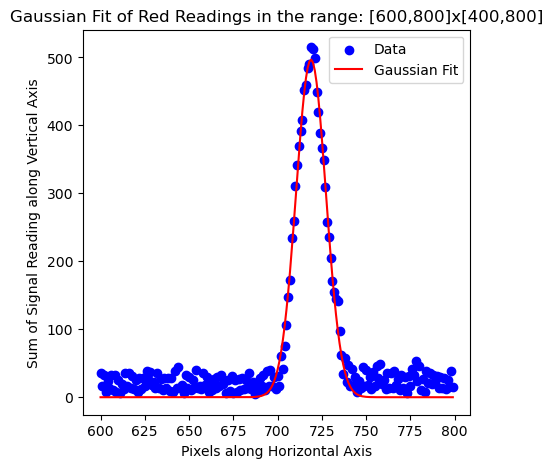

Fitted Gaussian distribution mean (mu): 718.8723263176474
Fitted Gaussian distribution standard deviation (sqrt(mu)): 8.426913252105356


<Figure size 640x480 with 0 Axes>

In [13]:
# Ranges Change per situation
yrange=[800,400]
xrange=[800,600]
ydiff=yrange[0]-yrange[1]
xdiff=xrange[0]-xrange[1]


#Arrays
data = np.zeros(ydiff)
summer = np.zeros(xdiff)

#Sum of components in columns
for j in range(xdiff):
    for i in range(ydiff):
        data[i] = image[yrange[1]+i,xrange[1]+j,0]
    summer[j] = np.sum(data)

# Sample data
x_data = np.linspace(0, 199, xdiff)  # x-values
y_data = summer


#Gaussian function to fit the data
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Fit the data to the Gaussian function
initial_guess = [200, 105, 40]  # Initial guess for amplitude, mean, stddev
params, _ = curve_fit(gaussian, x_data, y_data, p0=initial_guess)

# Get the fitted parameters
amplitude, mean, stddev = params

# Generate y-values based on the fitted Gaussian function
y_fit = gaussian(x_data, amplitude, mean, stddev)

# Plot the data and the fitted curve
plt.figure(figsize=(5,5))
plt.scatter(600 + x_data, y_data, label='Data', color='blue')
plt.plot(600 + x_data, y_fit, label='Gaussian Fit', color='red')
plt.xlabel('Pixels along Horizontal Axis')
plt.ylabel('Sum of Signal Reading along Vertical Axis')
plt.legend()
plt.title('Gaussian Fit of Red Readings in the range: [600,800]x[400,800]')
plt.show()
print(f"Fitted Gaussian distribution mean (mu): {600+params[1]}")
print(f"Fitted Gaussian distribution standard deviation (sqrt(mu)): {params[2]}")
plt.savefig("red.png", dpi=300)